In [1]:
import os 
import sys
import time 

### Select video file 

In [2]:
VIDEO = './../exampledata/ShowCase_1.mp4'
assert os.path.exists(VIDEO), 'Video path not recognized: no such file or directory'

VIDEOOUT = VIDEO.split("/")[-1].split(".")[0]
ROOT = "/".join(VIDEO.split("/")[:-1]) + "/"
TMP_DIR = "/".join(VIDEO.split("/")[:-2]) + "/temp/"

if not(os.path.exists(TMP_DIR)):
    os.mkdir(TMP_DIR)

path = "%s%s_frames" % (TMP_DIR, VIDEOOUT)
if not(os.path.exists(path)):
    os.mkdir(path)
path

'./../temp/ShowCase_1_frames'

### Extract all video frames with ffmpeg
ffmpeg needs to be installed locally see [https://www.wikihow.com/Install-FFmpeg-on-Windows](https://www.wikihow.com/Install-FFmpeg-on-Windows)

In [6]:
%%time
path = ("%s%s_frames/frame" % (TMP_DIR, VIDEOOUT)) + "%04d.jpg"
print(path)
!ffmpeg -i $VIDEO $path

./../temp/ShowCase_1_frames/frame%04d.jpg
Wall time: 4min 21s


ffmpeg version 2021-10-11-git-90a0da9f14-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (Rev5, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --e

frame= 2523 fps= 23 q=24.8 size=N/A time=00:01:24.18 bitrate=N/A speed=0.779x    
frame= 2536 fps= 23 q=24.8 size=N/A time=00:01:24.61 bitrate=N/A speed=0.779x    
frame= 2548 fps= 23 q=24.8 size=N/A time=00:01:25.01 bitrate=N/A speed=0.779x    
frame= 2560 fps= 23 q=24.8 size=N/A time=00:01:25.41 bitrate=N/A speed=0.779x    
frame= 2572 fps= 23 q=24.8 size=N/A time=00:01:25.81 bitrate=N/A speed=0.779x    
frame= 2585 fps= 23 q=24.8 size=N/A time=00:01:26.25 bitrate=N/A speed=0.779x    
frame= 2598 fps= 23 q=24.8 size=N/A time=00:01:26.68 bitrate=N/A speed=0.78x    
frame= 2610 fps= 23 q=24.8 size=N/A time=00:01:27.08 bitrate=N/A speed=0.78x    
frame= 2623 fps= 23 q=24.8 size=N/A time=00:01:27.52 bitrate=N/A speed=0.78x    
frame= 2635 fps= 23 q=24.8 size=N/A time=00:01:27.92 bitrate=N/A speed=0.78x    
frame= 2648 fps= 23 q=24.8 size=N/A time=00:01:28.35 bitrate=N/A speed=0.78x    
frame= 2660 fps= 23 q=24.8 size=N/A time=00:01:28.75 bitrate=N/A speed=0.78x    
frame= 2673 fps= 23 q=

### Run OpenPose on frames and generate Body Movement analysis
Requirements: 
- POSE_PROTO_FILE = r"openpose/pose_deploy_linevec.prototxt"
- POSE_WEIGHTS_FILE = r"openpose/pose_iter_440000.caffemodel"

In [ ]:
import process_OpenPose as openpose

openpose.process(VIDEO)

  1%|█▍                                                                                                                                                                                                                               | 39/6135 [00:32<14:01,  7.24it/s]

### Run RT-Gene on video 
Requirements: 
- If you have not done so yet run install_RTGene.py 
- Specify amount of people in video `maxPeople` for sorting algorithm (NOTE: all subjects should be visible in the beginning of the video)
- [OPTIONAL] provide a calibration file for your camera see e.g. `./calib_insta.pkl`

In [ ]:
import process_RTGene as rtgene

rtgene.process(VIDEO, maxPeople=6)

Loading networks
Using device cuda:0 for face detection.
PyTorch using 8 threads.

Load model ./../model_nets/Model_allsubjects1.h5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Loaded 1 model(s)
Video frame count:  6135.0
WARNING!!! You should provide the camera calibration file, otherwise you might get bad results. 
               Using a crude approximation!


  0%|          | 0/6135 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Anna\miniconda3\envs\conan_env\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-591fb7219cf7>", line 3, in <module>
    rtgene.process(VIDEO, maxPeople=6)
  File "C:\Users\Anna\PycharmProjects\conan\processing\process_RTGene.py", line 259, in process
    lstRet.append(estimate_gaze(image_file_name, image, landmark_estimator, gaze_estimator, _dist_coefficients, _camera_matrix, args))
  File "C:\Users\Anna\PycharmProjects\conan\processing\process_RTGene.py", line 59, in estimate_gaze
    subjects = landmark_estimator.get_subjects_from_faceboxes(color_img, faceboxes)
  File "C:\Users\Anna\PycharmProjects\conan\processing\rt_gene\extract_landmarks_method_base.py", line 126, in get_subjects_from_faceboxes
    initial_pts68_list = self.ddfa_forward_pass(color_img, roi_box_list)
  File "C:\Users\Anna\PycharmProjects\conan\processing\rt_g

Number of frames:  6135


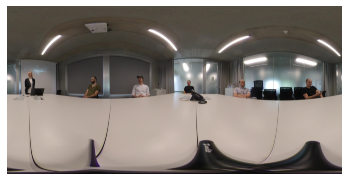

Frame 0 found 0 tags
Frame 1 found 0 tags
Frame 2 found 0 tags
Frame 3 found 0 tags
Frame 4 found 0 tags
Frame 5 found 0 tags
Frame 6 found 0 tags
Frame 7 found 0 tags
Frame 8 found 0 tags
Frame 9 found 0 tags
Frame 10 found 0 tags
Frame 11 found 0 tags
Frame 12 found 0 tags
Frame 13 found 0 tags
Frame 14 found 0 tags
Frame 15 found 0 tags
Frame 16 found 0 tags
Frame 17 found 0 tags
Frame 18 found 0 tags
Frame 19 found 0 tags
Frame 20 found 0 tags
Frame 21 found 0 tags
Frame 22 found 0 tags
Frame 23 found 0 tags
Frame 24 found 0 tags
Frame 25 found 0 tags
Frame 26 found 0 tags
Frame 27 found 0 tags
Frame 28 found 0 tags
Frame 29 found 0 tags
Frame 30 found 0 tags
Frame 31 found 0 tags
Frame 32 found 0 tags
Frame 33 found 0 tags
Frame 34 found 0 tags
Frame 35 found 0 tags
Frame 36 found 0 tags
Frame 37 found 0 tags
Frame 38 found 0 tags
Frame 39 found 0 tags
Frame 40 found 0 tags


KeyboardInterrupt: 

In [3]:
import process_AprilTag as apriltag

apriltag.process(VIDEO)